In [13]:
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [7]:
battles = pd.read_csv('data/battles.csv')
deaths = pd.read_csv('data/character-deaths.csv')
predictions = pd.read_csv('data/character-predictions_pose.csv')


In [8]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [9]:
deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [10]:
predictions.head()

,S.No,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [54]:
predictions.columns= predictions.columns.str.lower()
predictions = predictions.rename(columns=lambda x: re.sub('\s+', '', x))
deaths.columns= deaths.columns.str.lower()
deaths = deaths.rename(columns=lambda x: re.sub('\s+', '', x))
battles.columns= battles.columns.str.lower()
battles = battles.rename(columns=lambda x: re.sub('\s+', '', x))

In [51]:

for ind, n in enumerate(predictions.name):
    predictions.iloc[ind]["name"] = n.replace(" ", "").lower()
    "".join(ch for ch in predictions.iloc[ind]["name"] if ch.isalnum())

c:\Users\15164\Anaconda3\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
predictions["name"] = predictions["name"].str.replace(" ", "").str.lower()
deaths["name"] = deaths["name"].str.replace(" ", "").str.lower()
battles["attacker_commander"] = battles["attacker_commander"].str.replace(" ", "").str.lower()
battles["defender_commander"] = battles["defender_commander"].str.replace(" ", "").str.lower()


In [65]:
m = pd.merge(predictions, deaths, on='name', how='outer').merge(battles, left_on='name', right_on='attacker_commander', how='outer').merge(battles, left_on='attacker_commander', right_on='defender_commander', how='outer')

In [79]:
house_counts = pd.DataFrame(m['house'].value_counts())
house_counts_one = house_counts.loc[house_counts.house == 50].index.values.tolist()

m['house'] = m['house'].apply(lambda x: 'other' if x in house_counts_one else x)

In [81]:
m['house'].value_counts()

Night's Watch      1050
House Frey          961
other               850
House Stark         720
House Targaryen     620
                   ... 
House Bywater        10
House Volmark        10
House Mollen         10
House Staedmon       10
House Mertyns        10
Name: house, Length: 331, dtype: int64

In [82]:
model1 = sm.ols(formula = 'isalive~age+male+house+isnoble+numdeadrelations+popularity+culture', data = m).fit()


Text(0.5,0,'house_bin')

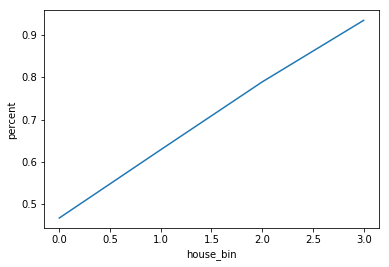

In [31]:
for house in characters.house:
    percent_alive = characters[characters.house == house].isAlive.mean()
    characters.loc[characters.house == house, 'house_alive'] = percent_alive

# Bin house_alive into 5 bins
binned_house_alive = pd.qcut(characters['house_alive'],10,retbins=True, duplicates = 'drop')
bins = binned_house_alive[1]
characters['house_alive_binned'] = pd.cut(characters['house_alive'],bins = bins)
dum = pd.get_dummies(characters.house_alive_binned,drop_first = True)
dum.columns = ['house_alive'+str(x) for x in range(1,len(bins)-1)]
predictions = pd.concat([characters,dum], axis = 1)

age_data = predictions.groupby('house_alive_binned')['isAlive'].agg([('percent','mean'),('nobs','count')]).reset_index(drop=False)
sns.lineplot(x = age_data.index, y= age_data['percent'])
plt.xlabel('house_bin')

In [32]:
#getting survival rates per house 
house_counts = pd.DataFrame(predictions.house.value_counts()).reset_index()
survival_counts = pd.DataFrame(predictions.groupby(['house']).isAlive.value_counts())
survival_counts.rename({'isAlive':'count_survived'}, axis='columns', inplace=True)
survival_counts = pd.DataFrame(survival_counts.to_records())
#for lysene and rivermen, no one survived — this will be taken into account later and for now they will be dropped
survival_counts = survival_counts[survival_counts['isAlive'] == 1] 
survival_counts.drop(columns=["isAlive"], inplace=True)
culture_counts = house_counts.rename(columns={'index':'house', "house" : "total"})
survival_df = house_counts.merge(survival_counts)
survival_df['percent_survived'] = (survival_df['count_survived']/survival_df['total'])*100
survival_df = survival_df.sort_values(by=['percent_survived'], ascending=False)
display(survival_df)

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat